In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(800, 1200, 3)


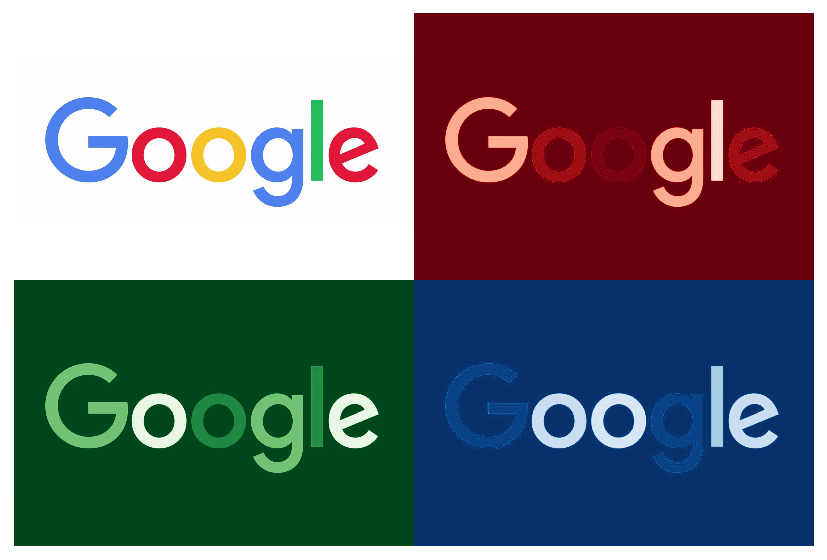

In [180]:
"""
- 우선 svg 파일을 읽을 수 없습니다. 
"""
# 샘플 그림을 그립시다. 
plt.style.use("default")


#plt.savefig('../../assets/images/markdown_img/180628_img_preprocessing_test_img.png', dpi=200)
jpg_img_arr = mpimg.imread('/Users/frhyme/Downloads/google2.0.0.jpg')

"""
- png, jpg의 shape이 다름. 왜 다르지?
http://www.itworld.co.kr/news/98431
- png는 무손실압축, jpg는 손실압축 
- png는 4차원인데, 이는 RGBA(red, green, blue, alpha)
- jpg는 3차원, RGB(red, green, alpha)
"""
# 어떻게 figure에 꽉 차게 그리지? 

height, width, layer = jpg_img_arr.shape
print(jpg_img_arr.shape)

f, axes = plt.subplots(2, 2, figsize=(8, 8*height/width))


axes[0][0].imshow(jpg_img_arr[:, :, :])
axes[0][0].axis('off')
axes[0][0].set_xticks([])# 이걸 하지 않으면 tick이 남아있어서 간격이 생김. 
axes[0][0].set_yticks([])

cmaps = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
for i in range(1, 4):
    axes[i//2][i%2].imshow(jpg_img_arr[:, :, i-1], cmap=cmaps[i-1])
    axes[i//2][i%2].set_xticks([])# 이걸 하지 않으면 tick이 남아있어서 간격이 생김. 
    axes[i//2][i%2].set_yticks([])
    axes[i//2][i%2].axis('off')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                    hspace = 0, wspace = 0)
plt.margins(0, 0, tight=False)
plt.show()

137

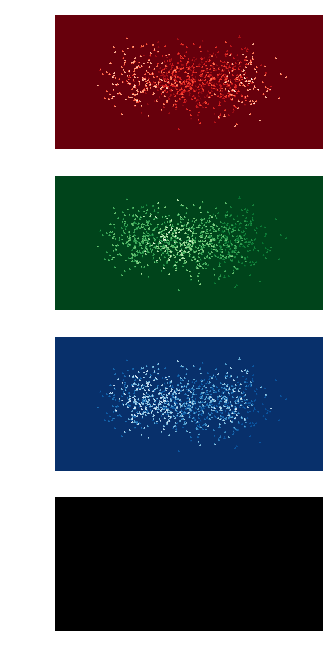

In [87]:
f, axes = plt.subplots(4, 1, figsize=(4, 8))
cmaps = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.gray]
for i in range(0, 4):
    axes[i].imshow(png_img_arr[:, :, i], cmap=cmaps[i])
    axes[i].margins(0)
    axes[i].axis('off')
plt.show()